<a href="https://colab.research.google.com/github/Ria-K912/IIIT-Hyderabad-Tutorial-Assignment-1/blob/main/Copy_of_DataFeatures%26Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SRISHTI'23 Tutorial 02<br>
Module Coordinator : amit.pandey@research.iiit.ac.in <br>

### The aim of this lab is to introduce DATA and FEATURES.
We will study: Feature extraction and Data Augmentation.
Let's get started.



Make a copy before running the cells

### Data can be anything like text, image , sound signals, and even a mix of multiple types (multimodal). We need to learn how to handle raw data, and how to use them for our analysis.

# Extracting features from data


 



## What are features? 
### Features are individual independent variables that act like an input to your system. 
A very basic example is: In z = x + y, x and y are the features.
We can have simple features like above or even more complex features learned by our machine learning models (we will study these later on).

# Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [2]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.

Let us visualize a few images here:

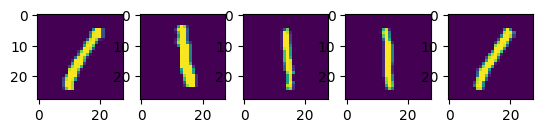

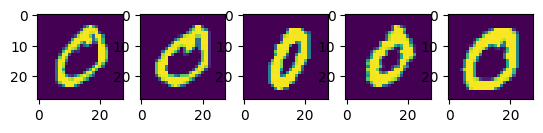

In [3]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [4]:
a = no1>0
a.shape, no1.shape

((6742, 28, 28), (6742, 28, 28))

In [5]:
## to help you understand how the np.sum is working to find count of pixels that are not zero.

mtx = np.arange(8).reshape(2,2,2)
a = mtx>1
a[0][0][0]
type(a[0][0][0])


numpy.bool_

## We can even use value of each pixel as a feature. But let us see how to derive other features.

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [6]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [7]:
sum1.shape

(6742,)

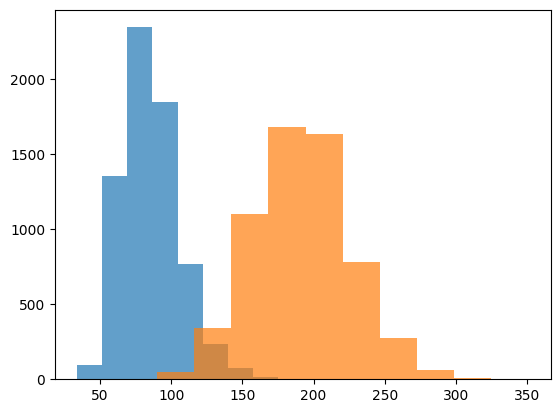

In [8]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);



We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [9]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

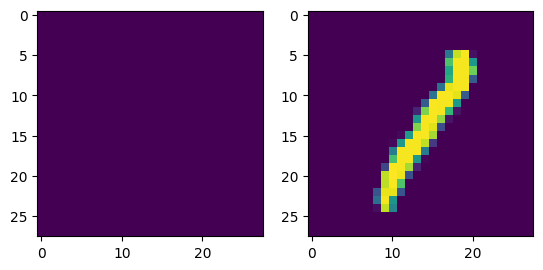

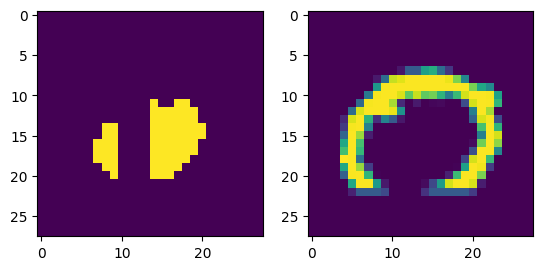

In [10]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

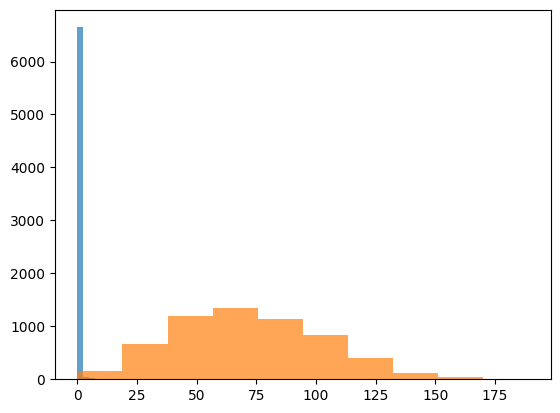

In [11]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [18]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull.sum()

hull1 = np.array([getHullPixels(i) for i in no1])
hull0 = np.array([getHullPixels(i) for i in no0])


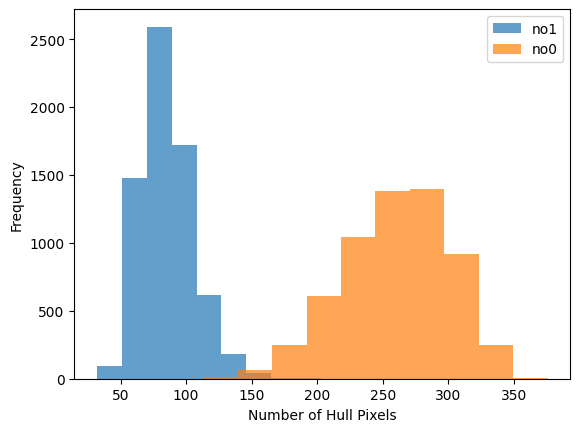

In [19]:
plt.hist(hull1, alpha=0.7, label='no1')
plt.hist(hull0, alpha=0.7, label='no0')
plt.legend()
plt.xlabel('Number of Hull Pixels')
plt.ylabel('Frequency')
plt.show()


Let us try one more feature, where we look at the number of boundary pixels in each image.

In [20]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

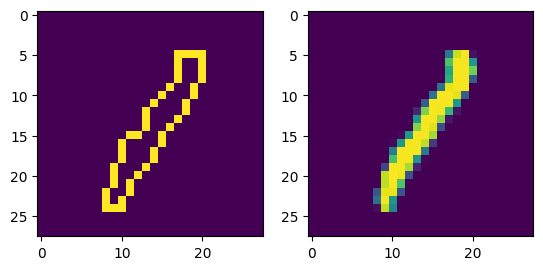

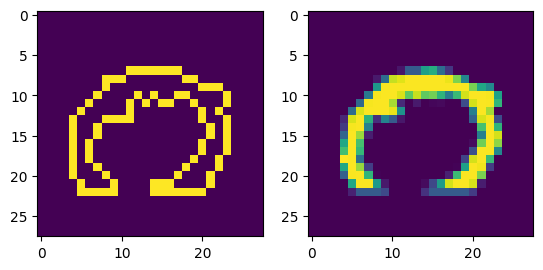

In [21]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

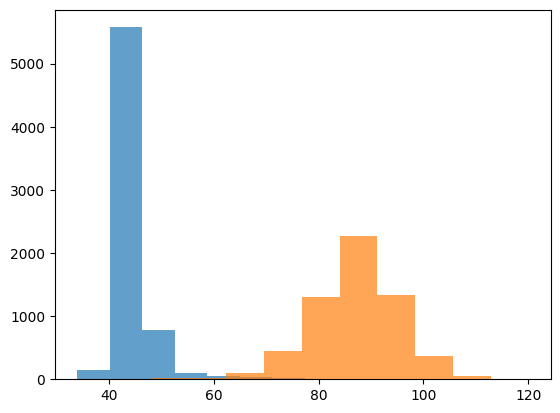

In [22]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

When we plot two features together, we can visualize the relationship between those two features in a scatter plot or a line plot.

Here are a few possibilities of what can happen when plotting two features together:

1) Positive correlation: If the two features have a positive correlation, the plot points will tend to lie along an upward-sloping line or exhibit a general trend of increasing values as one feature increases. This indicates that there is a positive relationship between the two features.

2) Negative correlation: If the two features have a negative correlation, the plot points will tend to lie along a downward-sloping line or show a general trend of decreasing values as one feature increases. This indicates that there is a negative relationship between the two features.

3) No correlation: If there is no apparent pattern or trend in the plot, it suggests that the two features are not correlated, and there is no systematic relationship between them. The plot points may appear scattered randomly without following any particular direction.

4) Non-linear relationship: In some cases, the relationship between the two features may not be linear. It could be curved or follow a different pattern. In such cases, plotting the features together may reveal a non-linear relationship, which can be captured using curve-fitting techniques or non-linear regression models.

Visualizing two features together allows us to gain insights into their relationship and understand how they interact. It can help in identifying patterns, outliers, clusters, or any other interesting characteristics of the data. Additionally, it can assist in making decisions related to feature selection, model building, and understanding the underlying data distribution.

The following codes clearly demonstrate what has been written above

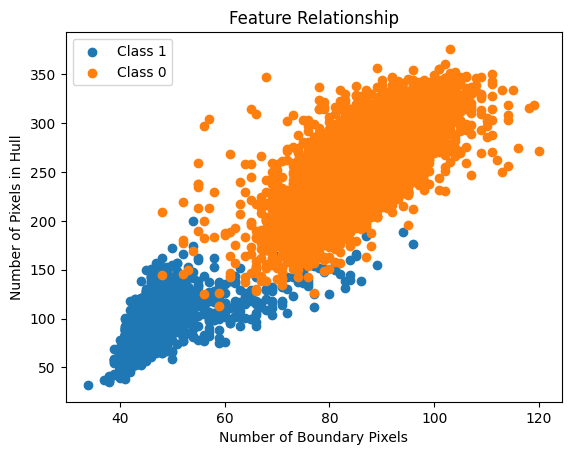

In [23]:
import matplotlib.pyplot as plt

plt.scatter(bound1, hull1, label='Class 1')
plt.scatter(bound0, hull0, label='Class 0')
plt.xlabel('Number of Boundary Pixels')
plt.ylabel('Number of Pixels in Hull')
plt.legend()
plt.title('Feature Relationship')
plt.show()


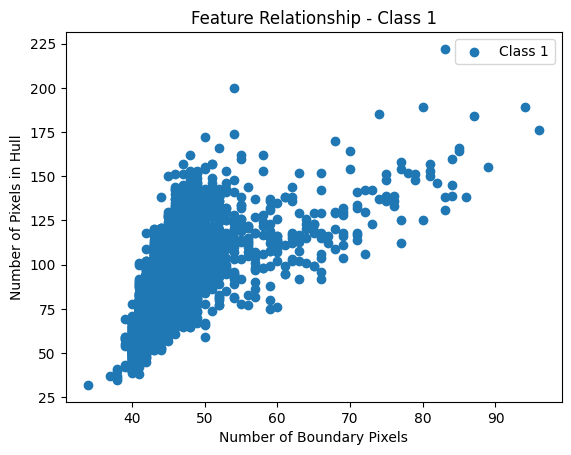

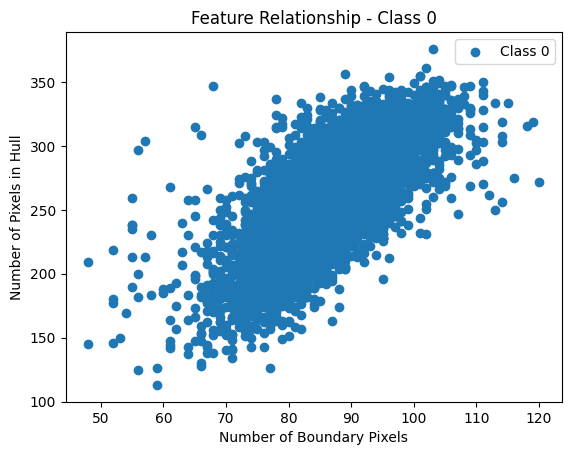

In [24]:
import matplotlib.pyplot as plt

# Plotting Class 1
plt.scatter(bound1, hull1, label='Class 1')
plt.xlabel('Number of Boundary Pixels')
plt.ylabel('Number of Pixels in Hull')
plt.title('Feature Relationship - Class 1')
plt.legend()
plt.show()

# Plotting Class 0
plt.scatter(bound0, hull0, label='Class 0')
plt.xlabel('Number of Boundary Pixels')
plt.ylabel('Number of Pixels in Hull')
plt.title('Feature Relationship - Class 0')
plt.legend()
plt.show()


Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1) Determining the best combination of features: The best combination of features depends on the specific problem and data at hand. It is generally determined through experimentation and evaluation. We can try different feature combinations and evaluate their performance using appropriate evaluation metrics such as accuracy, precision, recall, F1 score, or area under the ROC curve. We can use techniques like feature selection algorithms (e.g., forward selection, backward elimination, or L1 regularization) to identify the most informative features or perform a comprehensive search through different combinations using techniques like grid search or genetic algorithms.

2)Testing or visualizing four or more features: When working with four or more features, it becomes challenging to visualize the data directly in a single plot. However, there are several techniques we can use:

i)Scatter plots: Creating scatter plots by selecting pairs of features. Plot each class with a different color or marker to observe patterns or separability.
ii)Pair plots: Using seaborn's pairplot function to create a matrix of scatter plots for all pairs of features. This allows us to visualize the relationships between all feature combinations.
iii)Parallel coordinate plots: Plotting each data instance as a line, with each feature represented by a vertical axis. This plot helps visualize how different classes differ along multiple features simultaneously.
iv)Dimensionality reduction: Applying dimensionality reduction techniques like Principal Component Analysis (PCA) or t-SNE to project the data into a lower-dimensional space (e.g., 2D or 3D) while preserving important patterns or clusters.

3) Creating my own features:The following additional features for feature extraction can be considered:

i) Histogram of Oriented Gradients (HOG): Computing the HOG features to capture the local gradient orientations in the image. HOG features can provide information about the edges and contours of the digits.

ii) Zernike Moments: Calculating the Zernike moments, which are a set of orthogonal moments used to represent shape information. Zernike moments can capture the global shape characteristics of the digits.

iii) Pixel Intensity Statistics: Extracting statistical measures such as mean, standard deviation, minimum, and maximum pixel intensities within the digit image. These statistics can provide insights into the brightness and contrast variations within the digits.

iv) Local Binary Patterns (LBP): Applying LBP operator to extract texture features from the digits. LBP features capture the local patterns and textures present in the images.

v) Fourier Transform: Computing the Fourier Transform of the digit image to extract frequency domain features. Frequency components can provide information about the periodic patterns and texture variations within the digits.

vi) Radon Transform: Applying the Radon Transform to capture the linearity and angular features of the digits. The Radon Transform can help differentiate between digits with different orientations.

vii) Principal Component Analysis (PCA): Performing PCA on the image data to reduce the dimensionality and extract the most significant features. PCA can help capture the major variations and patterns in the digit images.

4) Suitability of features for different classes:The features mentioned above, such as aspect ratio, contour area, eccentricity, solidity, Hu moments, texture features, color histogram, HOG, Zernike moments, pixel intensity statistics, LBP, Fourier Transform, Radon Transform, and PCA, can be used for different classes other than just 0 and 1.

These features are designed to capture various aspects of the image data, such as shape, texture, color, frequency content, and statistical characteristics. While the original code that has been provided might be specifically tailored for binary classification of digits 0 and 1, the additional features can be used to generalize the classification approach to handle multiple classes.

To adapt the code for multi-class classification, we would need to modify the labeling and training process accordingly. Instead of considering only two classes (0 and 1), we could include all the different classes present in our dataset. We can then assign a unique label to each class and train our classifier to recognize and distinguish between these classes based on the extracted features.

It may be the case that the effectiveness of these features may vary depending on the specific characteristics and variations present in the different classes of the dataset. 

5) Taking more than two classes at a time: When dealing with more than two classes in a classification problem, several changes occur compared to a binary classification scenario. Some key to consider are as follows:

i) Label Encoding: Each class needs to be assigned a unique label or identifier. For example, if you have three classes (0, 1, 2), you could encode them as 0, 1, and 2, respectively.

ii) Multi-Class Classification Algorithms: Binary classification algorithms are not directly applicable to multi-class problems. You would need to use algorithms specifically designed for multi-class classification, such as Multinomial Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM) with multi-class extensions, or Neural Networks with appropriate output layers.

iii) Model Training: The model needs to be trained on the dataset with the multi-class labels. During training, the model learns to differentiate and classify instances into multiple classes simultaneously.

iv) Loss Function: The loss function used for training the model needs to be suitable for multi-class classification. Common loss functions for multi-class problems include Cross-Entropy Loss, Categorical Hinge Loss, and Softmax Loss.

v) Evaluation Metrics: The evaluation metrics for model performance may differ in multi-class classification. Accuracy, precision, recall, F1-score, and confusion matrix can be calculated considering multiple classes.

vi) Decision Boundaries: The decision boundaries become more complex in multi-class problems. The model needs to learn to differentiate and assign instances to the appropriate class, taking into account the features and patterns present in the data.

Something notable is that handling more classes can increase the complexity of the classification problem, and the performance of the model may vary depending on the nature and distribution of the classes. Additionally, as the number of classes increases, the dataset size and class imbalance can also impact the performance of the model.Proper feature selection, algorithm choice, hyperparameter tuning, and model evaluation are crucial when dealing with multi-class classification tasks to achieve accurate and reliable results.

## Features from CSV file

In [26]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [27]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [28]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [29]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})


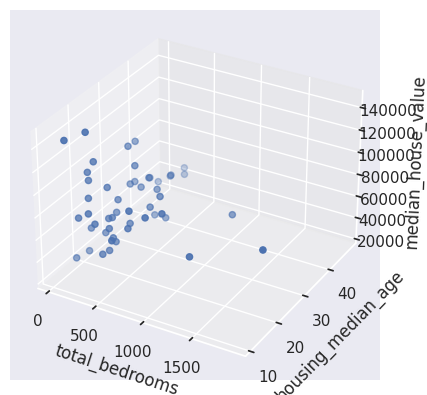

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

In [ ]:
## Task :
## Download a CSV file from the internet, upload it to your google drive.
## Read the CSV file and plot graphs using different combination of features and write your analysis
## Ex : IRIS flower datasaet

In [33]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [34]:
csv_path = '/content/drive/MyDrive/Iris.csv'
df = pd.read_csv(csv_path)


In [35]:
print(df.head())  # Displaying the first few rows of the dataset
print(df.columns)  # Displaying the column names/features


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


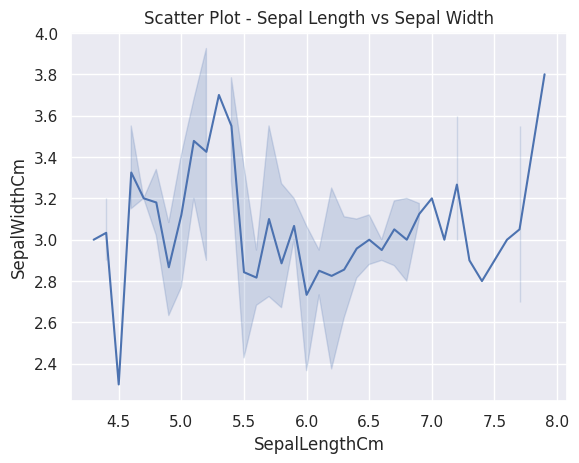

In [39]:
sns.lineplot(data=df, x='SepalLengthCm', y='SepalWidthCm')
plt.title('Scatter Plot - Sepal Length vs Sepal Width')
plt.show()


The above graph exhibits both increasing and decreasing patterns which can indicate a complex relationship between the variables and may suggest a non-linear correlation. In such cases, the correlation between the variables may not be adequately captured by a simple linear correlation coefficient.

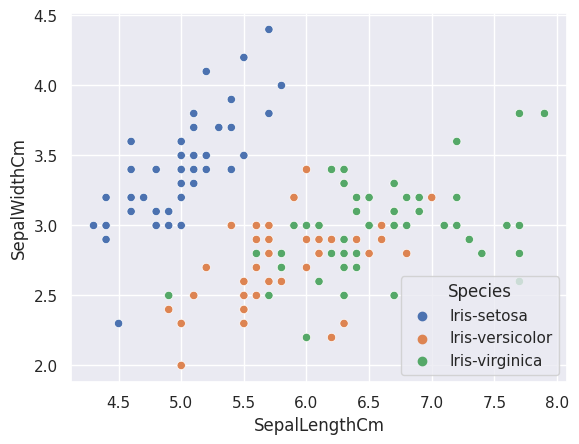

In [52]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.show()

From the above graph we can see that
Iris-virginica has a longer sepal length while Iris-setosa has larger sepal width
For setosa sepal width is more than sepal length
Iris-versicolor has moderate values for both sepal length and sepal width.There is no clear dominance of sepal length or sepal width in Iris-versicolor.

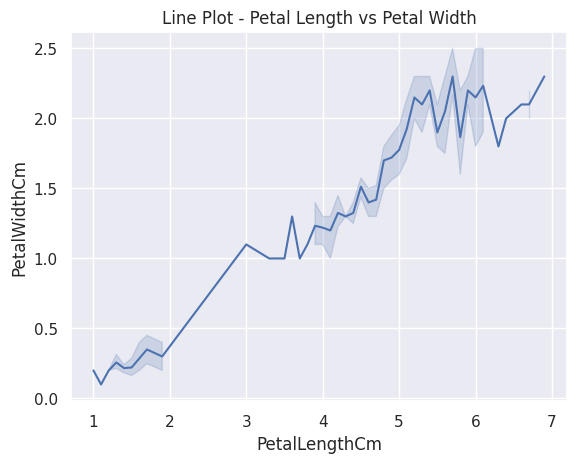

In [38]:
sns.lineplot(data=df, x='PetalLengthCm', y='PetalWidthCm')
plt.title('Line Plot - Petal Length vs Petal Width')
plt.show()


The above graph indicates non linear/ non monotonic correlation. The direction of the correlation remains consistent (i.e., as one variable increases, the other tends to increase as well) in some regions of the graph, but the rate or pattern of increase is not constant. This indicates that the variables are related only in those regions, but their relationship is more intricate and cannot be accurately described by a straight line.Since the graph is not strictly increasing but also falling down at some places, it indicates a non-monotonic or a non-linear relationship between the variables. In this case, the direction of the correlation is not consistent throughout the entire range of the variables.



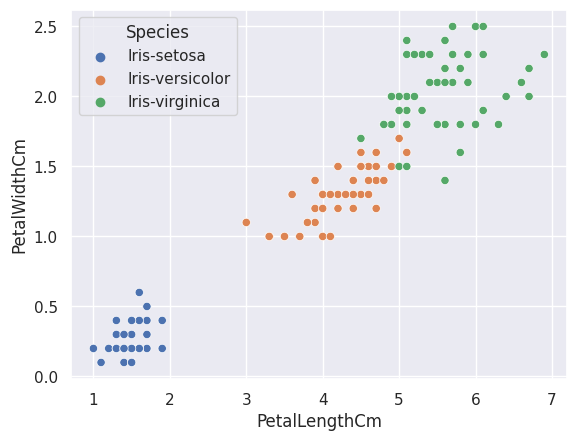

In [60]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.show()

From the above graph we can see that Iris-virginica has largest of the three petal length as well as larger petal width while Iris-setosa has smallest of the three petal width and petal length. For setosa petal length is more than petal width. Iris-versicolor has moderate values for both petal length and petal width.There is no clear dominance of petal length or petal width in Iris-versicolor.

In [58]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm','Species']
data = df[features]


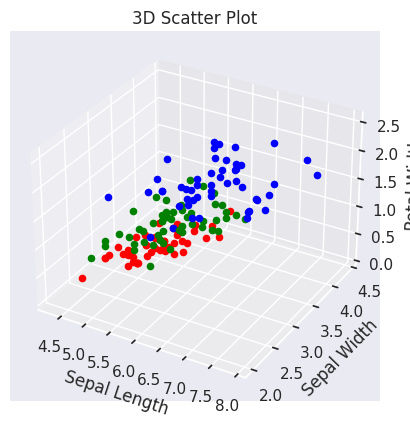

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Scatter plot
for index, row in data.iterrows():
    ax.scatter(row['SepalLengthCm'], row['SepalWidthCm'], row['PetalWidthCm'], c=species_colors[row['Species']])

# Set labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Width')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


From the 3D plot we can see that Iris Virginica has highest of the three petal length and most of them have higher sepal length and sepal width. The petal length, sepal length and sepal width are moderate in case of Iris Versicolor. The lowest of the petal length, sepal length and sepal width is found in Iris Setosa. There is a significant region of overlap between iris versicolor and iris setosa and also some region of overlap with iris virginica if we look only into the two features of sepal length and sepal width but the petal length can be considered as a feature to distinguish between the three in such cases.

In [47]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']
data = df[features]


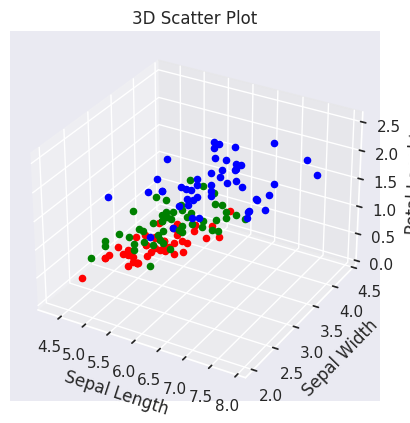

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Scatter plot
for index, row in data.iterrows():
    ax.scatter(row['SepalLengthCm'], row['SepalWidthCm'], row['PetalWidthCm'], c=species_colors[row['Species']])

# Set labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Lenght')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

From the 3D plot we can see that Iris Virginica has highest of the three petal width and most of them have higher sepal length and sepal width. The petal width, sepal length and sepal width are moderate in case of Iris Versicolor. The lowest of the petal width, sepal length and sepal width is found in Iris Setosa. There is a significant region of overlap between iris versicolor,iris setosa and iris virginica on the lower side of the space spanned by the three axes if we look only into the two features of sepal length and sepal width but the petal width can be considered as a feature to distinguish between the three in such cases. 

## Augmentation
It is a technique to increase the diversity of our training set by applying random (but realistic) transformations, such as image rotation, change of color etc. When we have limited training data, we can augment our data with help of these techniques.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

For this lab we will use a subset of MNIST that is very small, to better understand the effect of augmentation.

In [62]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

print("original data size:",train_X.shape)


original data size: (60000, 28, 28)


In [63]:
print(train_X[0].shape,train_y[0])

(28, 28) 5


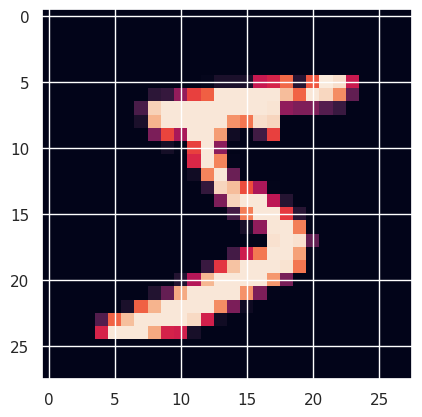

In [64]:
plt.imshow(train_X[0])

In [65]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

print("Now it is:", train_X.shape)

Now it is: (50, 28, 28)


Augmentation 1: rotation
Let us try rotating the image a little. We will use skimage library for this.

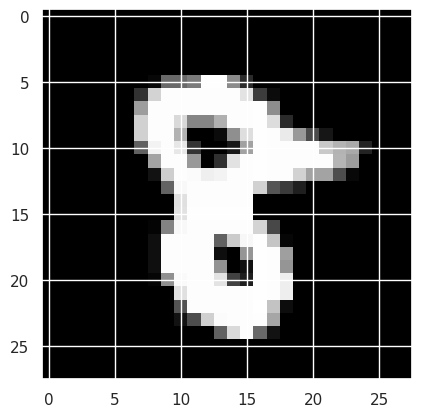

(28, 28)


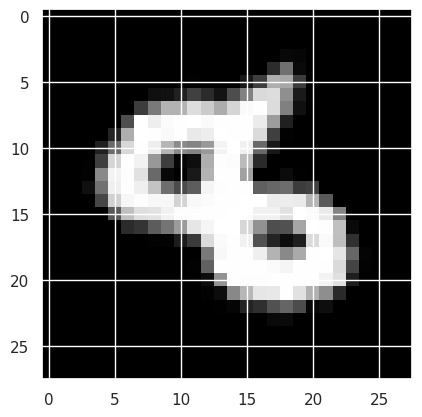

In [66]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
print(train_X[2].shape)
plt.imshow(rotate(train_X[2],45), cmap='gray')

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [67]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple. 

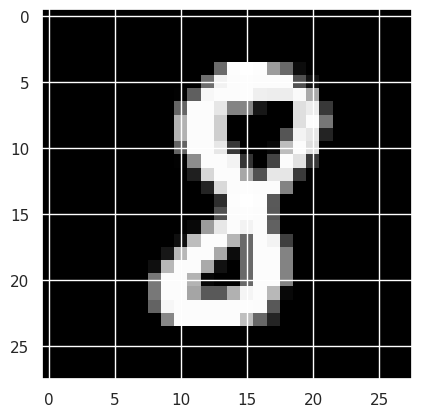

shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.77395605]
angle with constraint is: [19.1769234]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.43887844]
angle with constraint is: [-4.27850922]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.85859792]
angle with constraint is: [25.10185439]


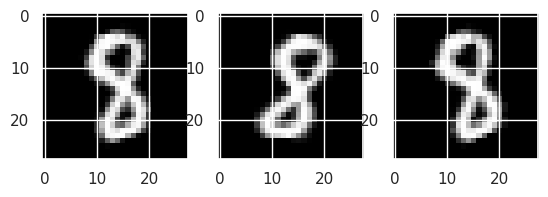

In [68]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us try one more augmentation, Shear: A transformation in which all points along a given line remain fixed while other points are shifted parallel to by a 
 distance proportional to their perpendicular distance from. Shearing a plane figure does not change its area. 

In [69]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

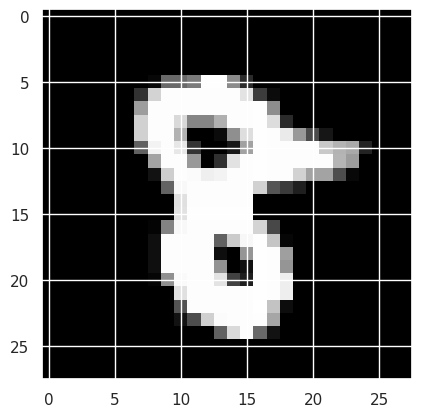

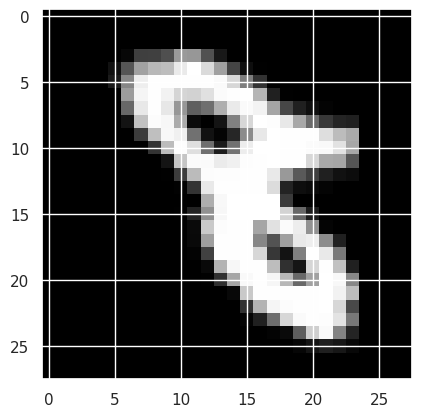

In [70]:
sample = train_X[2]
plt.imshow(sample, cmap='gray')
plt.show()

# apply shear
plt.imshow(shear(sample, 0.4), cmap='gray')

## Let us also see skeletonization of image

In [71]:
from skimage.morphology import skeletonize


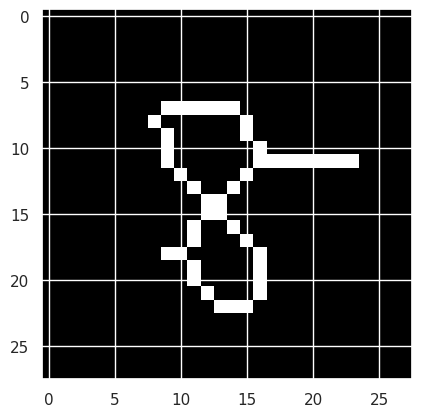

In [72]:
skeleton = skeletonize(train_X[2],method='lee')
plt.imshow(skeleton, cmap='gray')

In [73]:
#Structuring elements that are repeatedly used for thinning

S1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]]) # -1 for dont care
S2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])


def CheckMatch(window,kernel):
  for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if kernel[i,j]!=-1 and window[i,j]!=kernel[i,j]:
                return False
  return True

def ApplyKernel(image,kernel): #used
  height, width =  image.shape
  res = np.copy(image)
  for i in range(1,height-1):
    for j in range (1,width-1):
      window = image[i-1:i+2,j-1:j+2]
      #print('window shape',window.shape)
      Match_result = CheckMatch(window,kernel)
      if (Match_result):
        res[i,j]=0
  return res



def Skeletonization(image):
  '''pass binary image'''
  #new = np.copy(image)
  #old = np.zeros(image.shape,dtype=np.uint8)
  count = 1
  change = 1000
  while (change >0.01):
    print('count',count)
    new = image
    new = ApplyKernel(new,S1)
    new = ApplyKernel(new,S2)
    new = ApplyKernel(new,np.rot90(S1,1)) #90 degree rotate
    new = ApplyKernel(new,np.rot90(S2,1))
    new = ApplyKernel(new,np.rot90(S1,2)) # 180 degree rotate
    new = ApplyKernel(new,np.rot90(S2,2))
    new = ApplyKernel(new,np.rot90(S1,3)) # 270 degree rotate
    new = ApplyKernel(new,np.rot90(S2,3))
    count+= 1
    change = np.mean(np.abs(new-image))
    image = new
    plt.imshow(new,cmap='gray')
    plt.show()
  return new

In [74]:
binarized  =( train_X[0] > 0 ).astype(np.uint8)

count 1


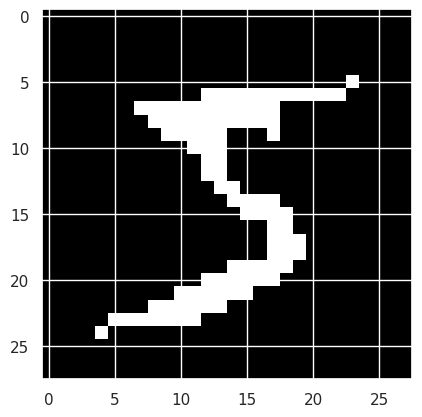

count 2


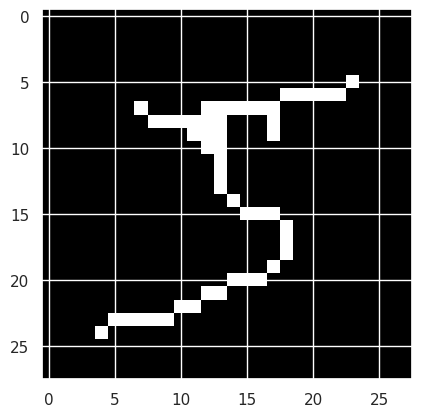

count 3


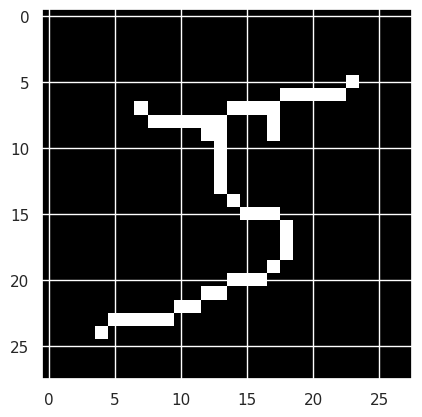

count 4


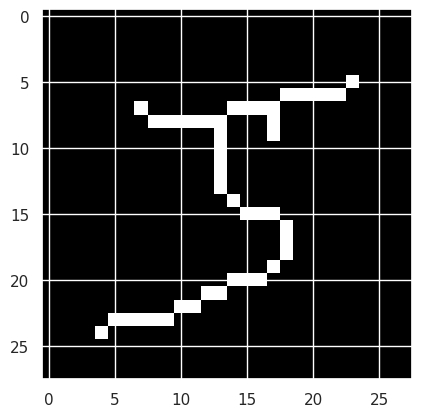

count 5


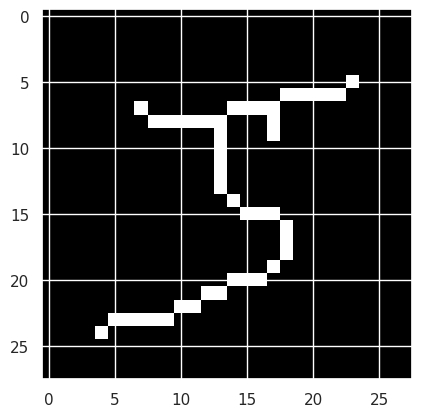

In [75]:
skeleton_five = Skeletonization(binarized)